# MOOC Notes: Machine Learning With Python, IBM ML0101EN

## Module 1 - Introduction to Machine Learning
Machine learning is **a model that makes predictions without being explicitly coded to do so**. Previously, we used to have *sets of rules* that analysed features of a dataset, but this was both inefficient and inaccurate. Now, with ML, we can accurately forecast and predict trends from large datasets efficiently.

To clear up some of the jargon:

1. **Artificial intelligence** is the attempt to make computers perform cognitive, thought-out actions, without being explicitly coded to do so.
2. **Machine learning** is the statistical part of AI, that deals with forecasting and predicting.
3. **Deep learning** is a subset of ML that uses high level ML models to perform human-like actions or decisions.

Next, we need to know the difference between supervised and unsupervised models:

1. **Supervised learning** is when you use a model that is *trained using labelled data*, or in other words, you pass it labelled data. It comes in two types: **classification**, where you are predicting categorical data, and **regression**, where you are predicting continuous data.
2. **Unsupervised learning** is exactly the opposite, *trained using unlabelled data*, so the model doesn't know what it is looking for, but rather, it is corrected. Popular examples may include **clustering**, where you attempt to group together data to classify them, and more.

## Module 2 - Regression
Regression can be defined as **the process of predicting a continuous variable**. We can use keywords:
1. **X** or **features** of a dataset are the variables that we use to predict. Wherever there are multiple features, we call this *multiple regression*.
2. **Y** or **labels** are the variables that we aim to predict.
Regression can also be split into **linear** and **non-linear**, where linear is where the model you use to predict is a straight line and non-linear is where the medel is not straight.
Some examples of regression analysis are:
1. Sales forecasting, where you are predicting stocks.
2. Predicting the price of a house.
3. Calculating employment income to give to an employee.

### Simple Linear Regression
With linear regression, we aim to generalise a trend by drawing a straight line on a scatter graph, so we can predict by reading off of it. And the equation of the line would look something like this:

$\hat{y} = \theta\ _{0} + \theta\ _{1} x _{1}$

where $\hat{y}$ and $x _{1}$ are the feature and label of the dataset, and $\theta\ _{0}$ and $\theta\ _{1}$ are the parameters we need to adjust to change the line, or the coefficients of the linear equation. To know how to change these parameters, when we are training the model, we look at a specific data point. Then we compare its $y$ with the $y$ given by the line of best fit, or the $\hat{y}$, thus performing $y - \hat{y}$ for each point in the dataset. This calculation is called the **residual error**. Using sigma notation, and then taking the mean square of all of these errors, we calculate the **MSE - Mean Residual Error**:

$MSE = \frac{1}{n} \sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2$

The objective of linear regression is to *minimise this equation and thus find the best line of best fit*. The reason linear regression is so god for problems like this is that by calculating the MSE, or alternatively just solving for $\theta\ _{0}$ and $\theta\ _{1}$ using simple linear equation maths, you can make the model without having to tune parameters yourself. It's also very fast as you're just solving an equation for a set of inputs to find your answer or prediction.

### Model Evaluation
There are two ways of evaluating your model after you've built it:
1. **Train and test on the same dataset** - you train your model using the entire dataset, then test it using a prtion of unlabelled data, and modify by comparing your predictions with the actual values. This will most likely have a high training accuracy, but a low out-of-sample accuracy.
2. **Train-test split** - where you set aside a portion of your data only for testing.
Note that it is **not beneficial to have too high a training accuracy**, as this will result in an overfit of the data, meaning the model is too specific to the dataset, and not general enough to be accurate with out-of-sample data. By this fact, train-test splitting is much more accurate. However, this is highly dependent on the accuracy of the dataset itself. To solve this dependency, though, we use **K-fold cross-validation**, which is essentially where we make 4 models in parallel of teh same dataset, and split them differently for each fold. Then we take an average to produce a more consistent out-of-scope accuracy value.

### Evaluation Metrics
Earlier we used MSE, but there are many other metrics used to evaluate your linear regression model:
1. **MAE - Mean Absolute Error**: the easiest, as it is just an absolute of the error.

$MAE = \frac{1}{n} \sum \limits_{i = 1}^{n} |y\ _{i}- \hat{y}\ _{i}|$
2. **RMSE - Root Mean Absolute Error**: the root of MSE so that it is more relatable to the unit values of the labels.

$RMSE = \sqrt{\frac{1}{n} \sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2}$
3. **RAE - Relative Absolute Error**: where your whole error is divided by the error compared to the mean of your dataset, hence more relative.

$RAE = \frac{\sum \limits_{i = 1}^{n} |y\ _{i}- \hat{y}\ _{i}|}{\sum \limits_{i = 1}^{n} |y\ _{i}- \bar{y}\ _{i}|} $
4. **RSE - Relative Squared Error**: the same as RAE, but using squaring instead of absolute errors.

$RSE = \frac{\sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2}{\sum \limits_{i = 1}^{n} (y\ _{i}- \bar{y}\ _{i})^2} $
5. **R Squared - $R^2$**: not an error metric, but used to show how accurate your model is on the whole.

$R ^ 2 = 1 - RSE$

### Regression Lab

#### Importing Needed Packages

In [2]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# Making plots inline in Jupyter
%matplotlib inline

#### Looking at the Dataset

Our dataset, `FuelConsumption.csv`, is a fuel consumption dataset that contains the following attributes:

- MODELYEAR
- MAKE
- MODEL
- VEHICLE CLASS
- ENGINE SIZE
- CYLINDERS
- TRANSMISSION
- FUEL CONSUMPTION in CITY
- FUEL CONSUMPTION in HWY
- FUEL CONSUMPTION in COMB
- CO2 EMISSIONS

#### Reading the Dataset

In [3]:
# Reading
df = pd.read_csv("FuelConsumptionCo2.csv")

# Looking at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Exploring the Data

Here we describe our dataset with a bunch of means and quartiles.

In [4]:
# Summarizing
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Now we'll select certain features, isolate them, and then plot them.

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


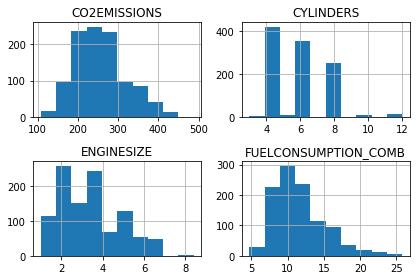

In [6]:
plot1 = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
plot1.hist()
plt.tight_layout()
plt.show()

Now we plot the features against EMISSION, to assess how linear the relations are.

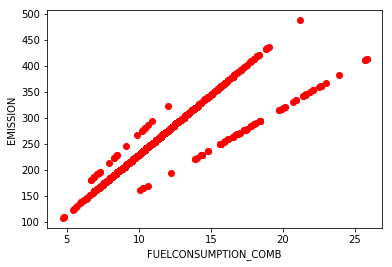

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show()

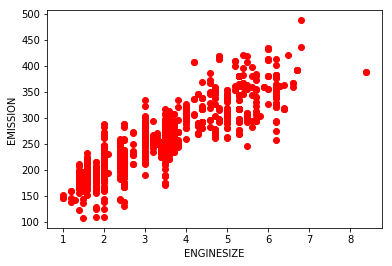

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

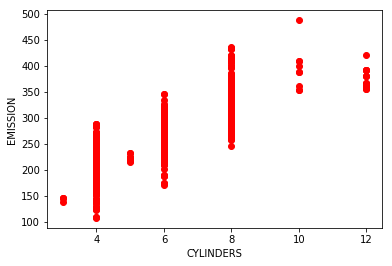

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSION")
plt.show()

#### Splitting the Data
It is quite common to use 80% of the data for training, and 20% for training, so we will split like so here. We must also do so randomly, so we will create a mask to select random observations.

In [10]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

#### Creating the Model
First, let's plot our training data:

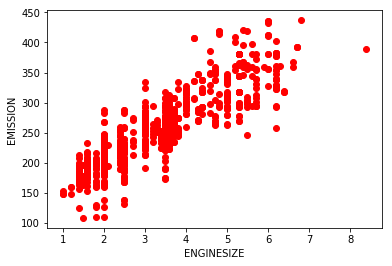

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

Now, let's use the `sklearn` module to train out model.

In [12]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)

print("Coefficient: ", regression.coef_[0])
print('Intercept: ', regression.intercept_)

Coefficient:  [38.74857696]
Intercept:  [126.44320187]


Now we can plot our line over the scatter graph to check:

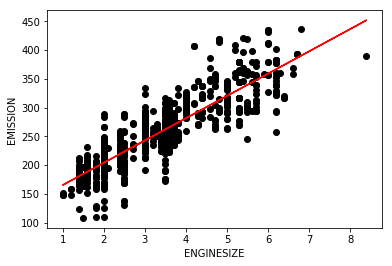

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "black")
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")

plt.show()

#### Evaluating our Model
Now we can import `sklearn`'s `r2_score` module to use $R^2$.

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

MAE = np.mean(np.absolute(test_y - test_y_hat))
MSE = np.mean((test_y_hat - test_y) ** 2)
R2 = r2_score(test_y_hat, test_y)

print("MAE: %.2f" % MAE)
print("MSE: %.2f" % MSE)
print("R2: %.2f" % R2)

MAE: 23.51
MSE: 973.06
R2: 0.73


### Multiple Linear Regression
Multiple linear regression is usually used as opposed to simple linear regression when you are attempting to find out how much of an effect one feature has on the label. It is the same as simple regression, except $\hat{y}$ is calculated by the following:

$\hat{y} = \theta ^ TX$

where $\theta$ is the horizontal vector of all coefficient values, and $X$ is the vertical vector of all features, plus a 1 for the intercept at the start. The product is a dot product.

The evaluation metrics are roughly the same, but calculating the coefficients is different, because we now have multiple features instead of just one. There are 2 popular methods for doing so:
1. **Ordinary Least Squares** - uses linear algebra to calculate estimates for the coefficients. However, this is not viable for datasets with observations past 10,000 as it's very slow at that point.
2. **Optimisation Methods** - attempt to minimise the evaluation metric. For example, *gradient descent* starts off with random coefficient values, then modifies them to minimise the MSE.
Predicting is the same, as we can plug in x values to get predictions from the equations we derive. The higher the coefficient, the more important the variable is to predicting the labels. Understand that **adding too many unnecessary variables may result in an overfit model, and low out-of-scope accuracy**, which we don't want. You can avoid this by making sure that **all features you use have a linear relationship with the label**.

#### Importing Necessary Libraries

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

#### Training the Model
Here we will use the same dataset, and the code is virtually the same, but you pass an array of features instead of one to the `fit()` function.

In [16]:
from sklearn import linear_model

df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

regression = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x, y)

y_hat = regression.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
variance = regression.score(x, y)
print(variance)

0.8473915220312912


#### Variance
Just to explain the `variance` variable above, variance is:

$Variance = 1 - \frac{Y - \hat{Y}}{Y}$

where $Y$ signifies a vector for all the actual labels from the dataset and $\hat{Y}$ is a vector for all the predictions.

### Non-Linear Regression
When our trend is curvy, a linear regression model i. e. a straight line of best fit would not be able to accurately model the trend. To get past this we can use **polynomial regression**, which is simply where, instead of assuming that the line of best fit can only be straight, we check for all degrees of x, so the line can curve. This translates to:

$\hat{y} = \theta _{0} + \theta _{1} (\theta _{2} )^x$

For example, for a cubic model, we would have 

$\hat{y} = \theta _{0} + \theta _{1}x + \theta _{2}x^2 + \theta _{3}x^3$

So, because we are using the same idea or mechanic as multiple linear regression, we can also use **Least Squares** here as an evaluation metric.

#### Importing Libraries
Here we will still be using the `FuelConsumptionCo2.csv` dataset to perform non linear regression.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Now, let's plot a feature against the label.

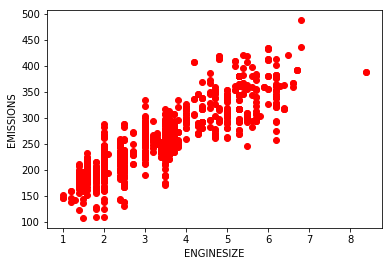

In [18]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

#### Splitting Data

In [19]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

#### The Non-Linear Part
We can use `scikit-learn`'s `PolynomialFeatures()` function to return a matrix of our features to the degree we specify. For example, if the parameter is `degree=2`:

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

In this respect, polynomial regression is just a special case of multiple linear regression as we are passing multiple features, so we can then deal with it as a normal linear regression problem.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Making the polynomial matrix
polynomial = PolynomialFeatures(degree=2)
train_x_polynomial = polynomial.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_hat = clf.fit(train_x_polynomial, train_y)

coefficients = clf.coef_
intercept = clf.intercept_

print(coefficients[0])
print(intercept)

[ 0.         52.6368631  -1.76003375]
[103.21090728]


Let's plot our model to see how it fits:

Text(0, 0.5, 'Emission')

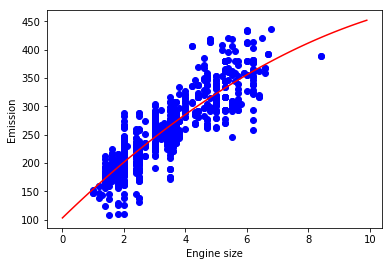

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation Metric

In [22]:
from sklearn.metrics import r2_score

test_x_polynomial = polynomial.fit_transform(test_x)
test_y_hat = clf.predict(test_x_polynomial)

print("MAE: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("MSE: %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2: %.2f" % r2_score(test_y_hat, test_y))

MAE: 23.69
MSE: 906.66
R2: 0.71


#### Types of Non-Linear Functions
##### Quadratic

$ y = x^2 $

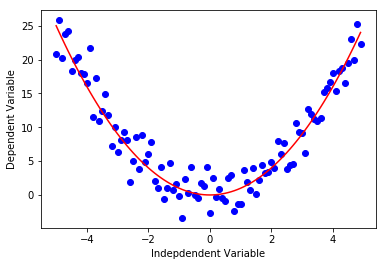

In [23]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

##### Exponential

$ y = a + bc ^ x $ where $b ≠ 0$, $c > 0$, $c ≠ 1$ and $x$ is real.

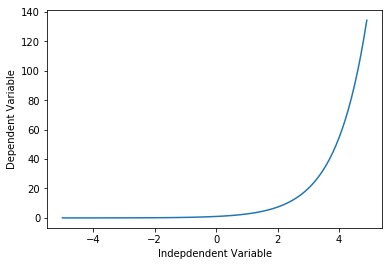

In [24]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

##### Logarithmic

$ y = \log(x) $

c:\users\arvin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


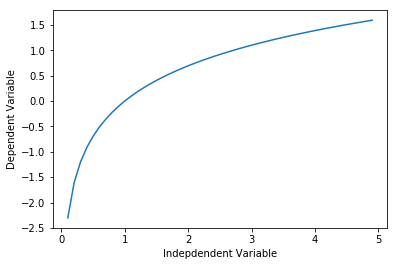

In [25]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

##### Logistic / Sigmoid Functions

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

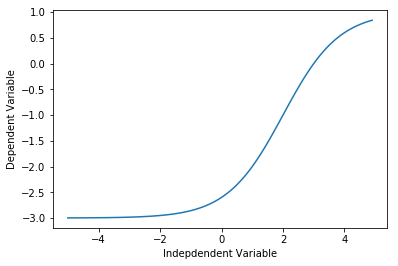

In [26]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Non-Linear Regression Project
Here we will use the `china_gdp.csv` dataset to show an example of non-linear regression.

#### Importing Libraries

In [27]:
import numpy as np
import pandas as pd

#### Looking at the Dataset

In [28]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


#### Visualising the Data

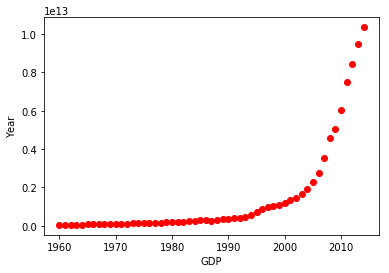

In [29]:
x, y = (df['Year'].values, df["Value"].values)
plt.scatter(x, y, color="red")
plt.xlabel('GDP')
plt.ylabel('Year')
plt.show()

#### Choosing a Model
This data looks most like the sigmoid model, so let's use that:

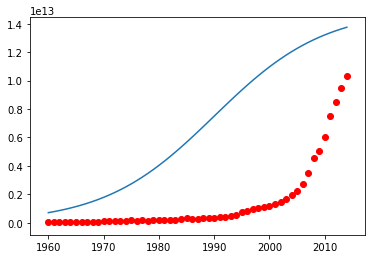

In [30]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1990.0

y_hat = sigmoid(x, beta_1 , beta_2)

plt.plot(x, y_hat*15000000000000)
plt.scatter(x, y, color="red")
plt.show()

Now we normalise our data.

In [31]:
xdata =x/max(x)
ydata =y/max(y)

#### Finding Parameters
To find parameters we can use the `curve_fit()` function which uses Least Squares to fit our function to the data.

In [32]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


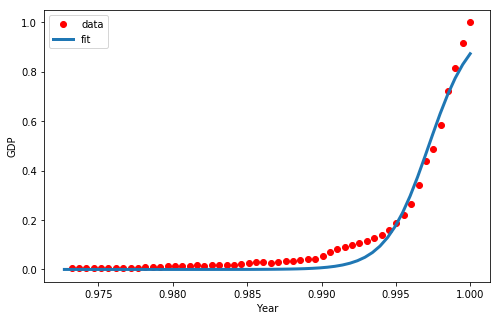

In [33]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Module 3 - Classification

### An Introduction to Classification
**Classification** is a supervised model, where the aim is *to classify features into discrete categories*. There are two types:
1. **Binary classification** - where there are only 2 categories for the label, for example, clancer detection, because you either have it or you don't.
2. **Multi-class classification** - where there are more than 2 categories for the label, for example, music recommending systems, as there are many types of music.

### K-Nearest Neighbours
**KNN**, short for K-Nearest Neighbours, is a classification algorithm that classifies data points, based on other data points' categories that are nearest them. It takes k of the nearest data points, and chooses the majority label among them as the prediction. Thus, there are 4 steps in this algorithm:
1. Pick a *value for k*.
2. Find the *distance of all data points from the unknown case*.
3. Select *k observations* that are *nearest to the unknown case*.
4. Find the *majority label among these observations*, and use this as your prediction for the unknown case.

To choose the correct k, we shouldn't be picking low values of k as this can make a *highly complex, overfitted model*. On the other side, picking a higher value of k may result in *over-generalisation*. So, to choose the best k, we must use an **evaluation metric**. In addition, to measure all data points from this, we can use many different measures, but the most popular is the **Euclidean distance**:

$D(x, y) = \sqrt{\sum \limits_{i = 1}^{n} (x\ _{i} - y\ _{i})^2}$

### Classification Evaluation Metrics
Here we study 3 evaluation metrics for classification:

1. The **Jaccard Index** - if you have 2 sets $y$ and $\hat{y}$, then the Jaccard index is the intersection of the 2 divided by their union. The maximum is 1, and the minimum is 0:

$J(y, \hat{y}) = \frac {|y  \cap  \hat{y}|} {|y  \cup  \hat{y}|}$ 

2. **F1 Score** - often used with a confusion matrix, is where you calculate precision and recall, and then use these to calculate the F1 score for each label. Here, P is for precision, R is for recall, TP means true positive, and FN means false negative.

$P = \frac {TP} {TP + FP}$

$R = \frac {TP} {TP + FN}$

$F1 = 2  * \frac {PR} {P + R}$

3. **Logarithmic Loss** - this can only be used where the output is a probability value between 0 and 1. For each row we can calcluate the LogLoss, which means the distance the prediction is away from the actual value. Then, we calculate an average LogLoss for the entire dataset. Here, the smaller the LogLoss, the more accurate the model:

$LL = - \frac{1}{n} \sum (y log(\hat{y}) + (1 - y)(1 - log(\hat{y}))) $

### An Example of Classification

#### Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#### Reading and Visualising the Dataset

In [35]:
df = pd.read_csv("telecust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Here we check how many categories there are.

In [36]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

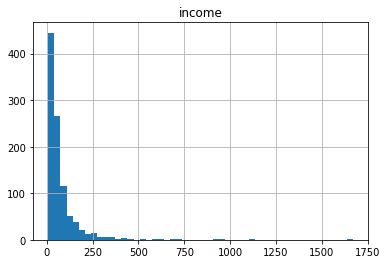

In [37]:
df.hist(column='income', bins=50)
plt.show()

In [38]:
# Converting a pandas dataframe to a numpy 2D array.
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [39]:
# Checking our categories.
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [40]:
# Normalising our data.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#### The Train-Test Split
Because this is a 2D numpy array, we have to use a different method to train-test split the data. We can use the `sklearn.model_selection.train_test_split()` function to do this.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#### Fitting Our Model


In [46]:
from sklearn.neighbors import KNeighborsClassifier

Let's start off with a random number for k for now.

In [55]:
k = 4
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = neighbors.predict(X_test)

#### Accuracy Evaluation
Obviously, we need to choose the right number for k, and to do that we have to be able to evaluate how good each value of k is for accurate predictions. To do this we can use the `sklearn.metrics` module as always.

In [56]:
from sklearn.metrics import accuracy_score

print(f"Training accuracy: {accuracy_score(y_train, neighbors.predict(X_train))}")
print(f"Testing accuracy: {accuracy_score(y_test, y_hat)}")

Training accuracy: 0.5475
Testing accuracy: 0.32


Now, we create a loop that does this for all values of k from 1, up until a certain number `K`.

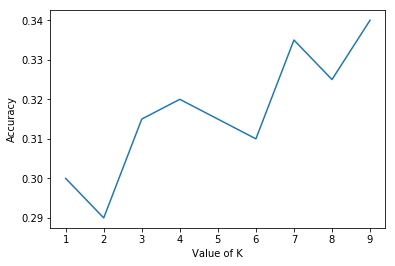

Best accuracy: 0.34 at k = 9


In [59]:
K = 10
mean_accuracy = np.zeros((K - 1))

for i in range(1, K):
    neighbors = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_hat = neighbors.predict(X_test)
    
    mean_accuracy[i - 1] = accuracy_score(y_test, y_hat)
    
    
plt.plot(range(1, K), mean_accuracy)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

print(f"Best accuracy: {mean_accuracy.max()} at k = {mean_accuracy.argmax() + 1}")

### Decision Trees
**Decision trees** are . Each *internal node* is a test for the unlabelled case, each *branch* corresponds to the result of the previous internal node, and each *leaf node* assigns the unlabelled case a classification, or a prediction. So, these are the steps for making a decision tree:
1. Choose an **attribute** from the ones you have.
2. Calculate the **significance of the attribute** that you chose.
3. **Split your data** based on the values of the best attributes.
4. Rpeat steps 1 to 3 for all attributes.

Ideally, you should be choosing attributes based on how well they split the data. In other words, *the more predictive the attribute, the better it is*. It would then have a **high predictiveness, low impurity and low entropy**, where entropy is the randomness of the split. A node is considered pure if *100% of the time, the cases all fall into a specific category or label*. 

Entropy can be calculated as:

$E = - p(A)log(p(A) - p(B)log(p(B)$

So, for each attribute, we calculate the entropy before the split, and the entropy after the split for each branch. Finally, we can calculate the **information gain**, which is:

$I = E_{before} - \sum E_{after for  each  branch}$

### An Example of a Decision Tree Model

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### Looking at the Data
This data is about drug response, and categorising which drugs may work well for a patient based on their age, sex, blood pressure and cholestrol. In other words, these are the features of the dataframe.

In [3]:
df = pd.read_csv("drug200.csv", delimiter = ",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#### Preprocessing the Data


In [6]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug']

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

What we did here was we converted the categorical variables to numerical values, because `sklearn`'s decision tree model doesn't handle categorical features.
#### The Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

**Note** - here we pass the `random_state` argument to be `3`, which means whenever we pass `3` to the same dataset, we will get exactly the same split - it's a way of ensuring reproducibility.

#### Making the Model

In [9]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now to check the prediction is working:

In [10]:
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#### Evaluation Metrics

In [11]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


### Logistic Regression
**Logistic regression** can be defined as a **binary** classification algorithm that can be used for categorical variables, and takes continuous features. This means that categorical features must be dummy coded into continuous variables. Logistic regression is thus suitable for:
1. Predicting binary features.
2. Predicting a probability, which would be a value between 0 and 1.
3. Understanding the impact of a specific feature.
To formalise this, given a matrix of features $X$ and a vector of corresponding labels $y$, we want to make a model $\hat{y}$ which returns the probability that a feature is $0$ or $1$:

$\hat{y} = P(y = 1 | x)$

To do this, we can basically modify linear regression to make it categorical. Recall that $\theta ^ TX$ means $\theta _{0} + \theta _{1}x _{1} + \theta _{2}x _{2} + ...$, which is the model for predicting $\hat{y}$. Now, we need some sort of function that transforms this to a number between 0 and 1, to make it probabilistic. To do this we use the **sigmoid** (σ) function, which is:

$σ(x) = \frac {1}{1 + e^-x}$

In this function, when $x$ increases, $e^-x$ approaches 0 and σ approaches 1. Likewise, when $x$ decreases, $e^-x$ increases, and σ approaches 0. So, our model is:

$\hat{y} = σ(\theta ^ TX) = P(y = 1 | x) $

Therefore, the **training process** is:
1. Initialise $\theta$, or the coefficients.
2. Calculate $\hat{y}$ for all observations.
3. Record all errors as $\hat{y} - y$, and take an average. This is the cost.
4. Modify $\theta$ to reduce the cost.
5. Repeat from step 2.

A few points to clarify. First, when we *take the average* we can use the **MSE** of all costs. However, mathematically, it is quite tough to find a global mimimum for such a complex function, so instead, we will take the $-log$ function. This is:

If $y = 1$, $Cost = -log(\hat{y})$

If $y = 0$, $Cost = -log(1 - \hat{y})$

Now, we take the MSE of the above, and call this our cost function.

Next, to minimise this function, we use one of the most famous approaches, an *optimisation* approach called **gradient descent**. It can be summarised as *using a vector of the partial derivatives of the cost, with respect to each parameter, to update each parameter, so that you are minimising the cost function*. The vector is usually called $∇J$.

### An Example of Logistic Regression
Here we will try to predict customer churn for a telecommunications company using features such as services, account info and demographic info.

#### Importing Libraries

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#### The Data

In [4]:
df = pd.read_csv("ChurnData.csv")
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
# Narrowing features
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']])
y = np.asarray(df['churn'])

In [7]:
# Normalising the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [8]:
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.2, random_state = 2)

#### The Logistic Regression Model
Just as a note, here, the parameter `C` is the inverse of *regularisation*, which means *adding in data to a dataset to prevent overfitting*.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xtrain,ytrain)

In [10]:
# Now predicting
yhat = LR.predict(Xtest)

To return the probability for each class, we can use `predict_proba()` instead. The first column is for class 1, and the second is for class 0.

In [11]:
yhat_proba = LR.predict_proba(Xtest)

#### Evaluation

In [12]:
# Jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest, yhat)

0.775

In [13]:
# F1 Score
from sklearn.metrics import classification_report
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.59      0.83      0.69        12

   micro avg       0.78      0.78      0.78        40
   macro avg       0.75      0.79      0.76        40
weighted avg       0.82      0.78      0.78        40



In [14]:
# Log Loss
from sklearn.metrics import log_loss
log_loss(ytest, yhat_proba)

0.552789839718401

[[10  2]
 [ 7 21]]


TypeError: 'str' object is not callable

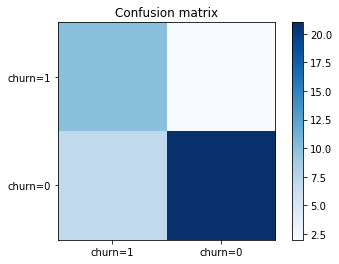

In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_cm(cm, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    else:
        pass
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)
    
    format = '.2f' if normalize else 'd'
    threshold = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], format), horizontalalignment = 'center', color = 'white' if cm[i, j] > threshold else black)
        
    plt.ylabel('True')
    plt.xlabel(predicted)
    plt.tight_layout()
    plt.show()
    
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
plot_cm(cnf_matrix, classes=['churn=1','churn=0'], normalize= False,  title='Confusion matrix')

### Support Vector Machines
**SVM** is a classification algorithm that uses a separator to predict categories. The data is first mapped to a high dimensional space, and then a separator plane is used to categorise the observations. This is called an **optimised hyperplane separator**. The function that we use to map the data into a suitable number of dimensions is called the *kernel function*, and there are 4 main kernel functions that can be used:
1. Linear
2. Polynomial
3. RBF
4. Sigmoid

Because we are finding a separator, we should only really take into account the nearest points to the hyperplane, and these points are called **support vectors**. Thus, we can formalise the problem into *finding the hyperplane with the largest margin between support vectors of different classes*. The math behind this is complex, but essentially, we are finding parameters to define the function of the plane, so we can even use *gradient descent*. 

SVM is good, because it is very memory efficient and can work in much higher dimensions, but on the other hand, it is also prone to overfitting, and doesn't work well with larger datasets.
#### The Data

In [16]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("cell_samples.csv")
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [28]:
# Making BareNuc numerical
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [29]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X[:5]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [30]:
df['Class'] = df['Class'].astype('int')
y = df['Class']
y[:5]

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int32

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("Train: ", Xtrain.shape, ytrain.shape)
print("Test: ", Xtest.shape, ytest.shape)

Train:  (546, 9) (546,)
Test:  (137, 9) (137,)


#### The SVM Model

In [35]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
yhat = clf.predict(Xtest)
yhat[:5]

array([2, 4, 2, 4, 2])

#### Evaluation

In [37]:
from sklearn.metrics import f1_score
f1_score(ytest, yhat, average='weighted')

0.9639038982104676

## Module 4 - Clustering
Clustering is a type of **unsupervised learning** that groups together observations based on *similarities between features*, and then uses these groups to *classify* unlabelled data. The main difference between clustering and classification is that clustering **makes categories**, whilst classification groups based on **pre-defined classes**. There are 3 main types of clustering algorithms:
1. **Partition-based clustering** - where the clustering divides data into groups or sets, like *K-Means*.
2. **Hierarchichal clustering** - where the clustering divides data into tree nodes, or branches, like *Agglomerative*.
3. **Density-based clustering** - where the clustering produces arbitrary groups, like *DBSCAN*.

### K-Means
K-Means is a clustering algorithm that *divides data into **non-overlapping** clusters that have no internal structures*. Counter-intuitively, instead of using a similarity metric to group clusters, it can be shown that using a **dissimilarity metric** is much more effective. Thus, the aim is to *minimise intra-cluster dissimilarity, and maximise inter-cluster dissimilarity*. For this dissimilarity metric, as always, we can use the **Euclidean distance**:

$D(x, y) = \sqrt{\sum \limits_{i = 1}^{n} (x\ _{i} - y\ _{i})^2}$

We must define the number of clusters when doing K-Means, as this is $k$. For each cluster we have a **centroid**, which is the centre of the cluster. Then, we use the Euclidean distance to find the distance of the point from each centroid $C$, and use this to create a **distance matrix**. Finally we would use this to group each data point and thus define the clusters. 

The **error** of this model is called the **SSE**, or Sum Squared Error, which is the *squared sum of each distance between a point and its centroid*. If this is minimised, it means that our cluster is accurate at classification.

$SSE = \sum \limits_{1}^{n} (x\ _{i} - C\ _{j})^2$

To minimise this error, we need to move the centroids. To make sure we are moving the centroid in the right direction, we make the *centroid location equal to the mean of all points in its cluster*. Then, we would have to recompute the distance matrix, and **iterate till the centroids stop moving**.

As for determining $k$, we can make a model for each value of $k$. However, the problem is that as the number of centroids increase, the distance to the centroids will **decrease always**, so the **error always decreases**. To counter this, we can use the **elbow method**, which is when we determine $k$ by looking at when the rate of decrease of error for increase in k rapidly changes. This is called the *elbow point* and it is the value of $k$ we use in the end.

#### K-Means Data

In this example we will be doing customer segmentation on `Cust_Segmentation.csv`.

In [38]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [40]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [42]:
# Dropping the categorical variable
df = df.drop('Address', axis = 1)
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [43]:
# Normalising our data
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

#### The Model

In [44]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

#### Insights

In [45]:
# Appending our predictions to df
df['KM'] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,KM
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [46]:
df.groupby('KM').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
KM,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


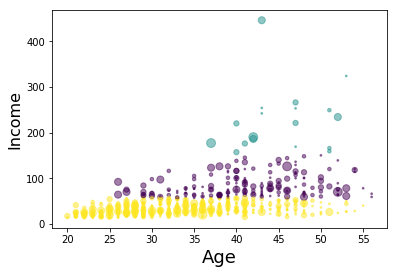

In [47]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

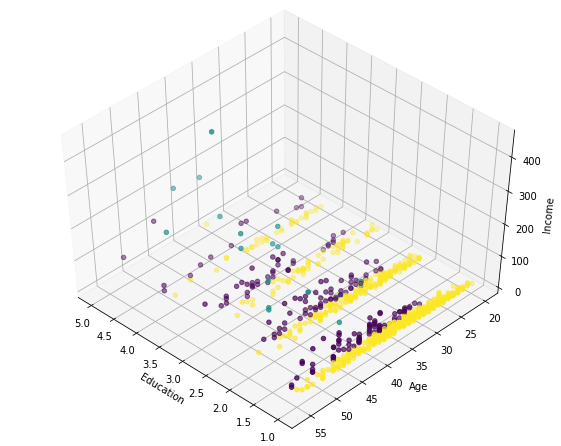

In [48]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

Here we visualised our data to see how the clustering divided our data. By the loos of it, the model divided the observations into:
1. Rich, educated and old
2. Middle aged and middle income
3. Young and low income